In [16]:
## library imports

## db con
from config import get_engine

## data manipulation 
import pandas as pd

## linear algebra 
import numpy as np 

## helper functions
from helper import get_scores, get_win_pcts

## visualization 
import matplotlib.pyplot as plt

In [8]:
## data 

dfs = []

for classification in range(0,4):
    dfs.append(get_scores(classification=classification))
    
## union data 

all_games = pd.concat(dfs,sort=True,axis=0)

## Final Scores

In [38]:
def plot_final_scores(df,**kwargs):
    assert all ([
        
        col in df.columns for col in ['GameID','TeamID','FinalScore']
        
        
    ])
    
    scores = df.groupby(['GameID','TeamID'])[['FinalScore']].max().groupby(['GameID'])['FinalScore'].sum()
    
    
    return scores,scores.plot(kind='hist',**kwargs)

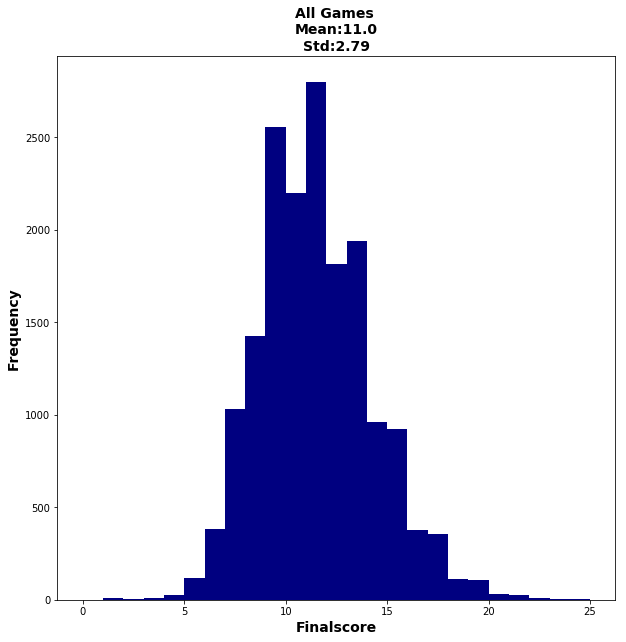

In [39]:
## all linescores

fig,ax = plt.subplots(1,figsize=(10,10))
font_kwargs = {'fontweight':'bold','fontsize':14}

scores = plot_final_scores(all_games,ax=ax,color='navy',bins=range(0,26))[0]

ax.set_xlabel('Finalscore',**font_kwargs)
ax.set_ylabel('Frequency',**font_kwargs)

mean,std = scores.mean(),scores.std()

ax.set_title('All Games \nMean:{}\nStd:{}'.format(round(mean,2),round(std,2)),**font_kwargs)

plt.show()

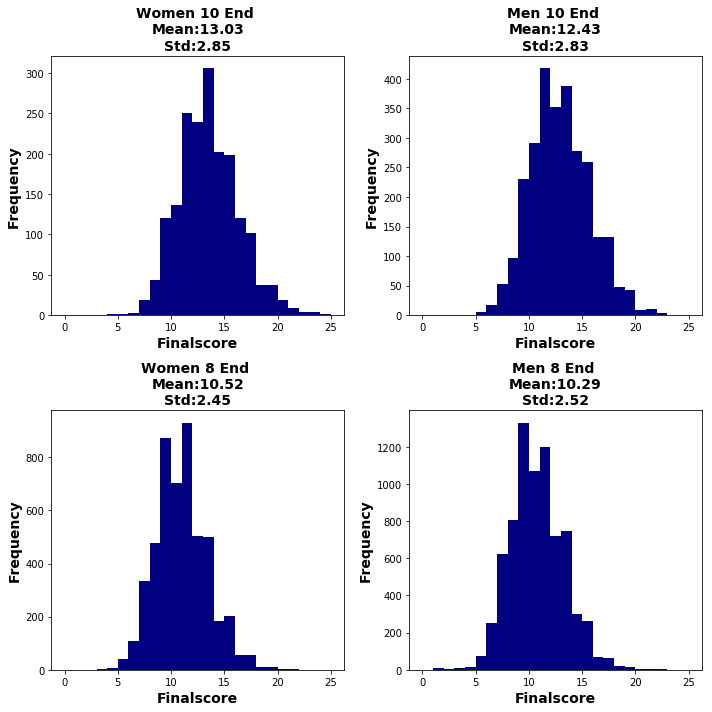

In [40]:
## individual 

fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))

types = ['Women 10 End','Men 10 End','Women 8 End','Men 8 End']

for i, typ in enumerate(types):
    
    df = dfs[i]
    ax = axs.flat[i]
    
    scores = plot_final_scores(df,ax=ax,color='navy',bins=range(0,26))[0]

    ax.set_xlabel('Finalscore',**font_kwargs)
    ax.set_ylabel('Frequency',**font_kwargs)

    mean,std = scores.mean(),scores.std()

    ax.set_title('{} \nMean:{}\nStd:{}'.format(typ,round(mean,2),round(std,2)),**font_kwargs)

plt.tight_layout()
plt.show()

## End Results

In [55]:
def plot_end_results(df,**kwargs):
    assert all([
        
        col in df.columns for col in ['GameID','EndResult','EndNum']
        
    ])
    
    results = df.groupby(['GameID','EndNum'])['EndResult'].max()
    
    weights = [1/len(results)]*len(results)
    
    kwargs['weights']=weights
    
    return results, results.plot(kind='hist',**kwargs)

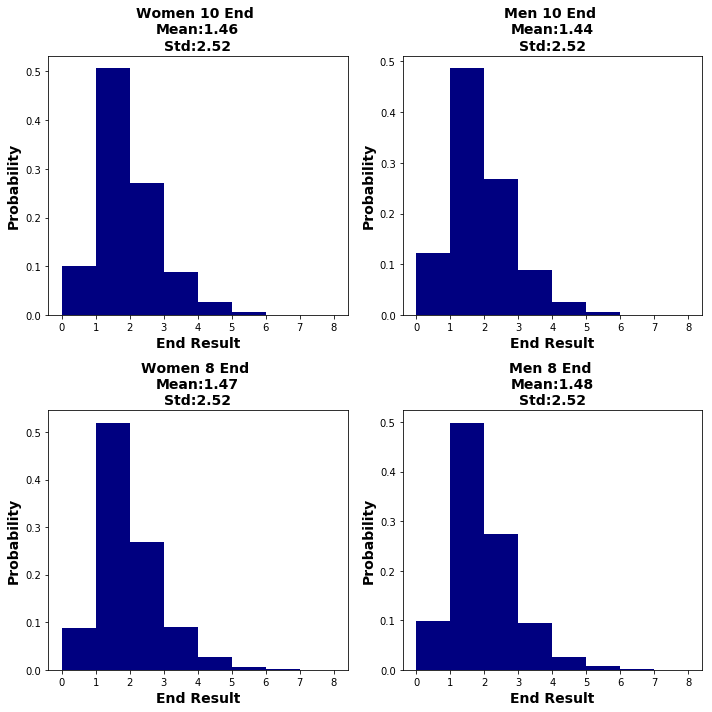

In [58]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

for i, typ in enumerate(types):
    ax = axs.flat[i]
    df = dfs[i]
    
    results = plot_end_results(df=df,bins=range(0,9),ax=ax,color='navy')[0]
    
    ax.set_xlabel('End Result',**font_kwargs)
    ax.set_ylabel('Probability',**font_kwargs)
    
    mean,std = results.mean(),scores.std()

    ax.set_title('{} \nMean:{}\nStd:{}'.format(typ,round(mean,2),round(std,2)),**font_kwargs)

plt.tight_layout()
plt.show()
    

## Points Scored 

In [114]:
def plot_pts_scored(df,**kwargs):
    assert all([
        
        col in df.columns for col in ['EndNum','EndResult','Hammer']
        
    ])
    
    
    _df = df.copy()
    _df = _df.loc[(_df.EndResult > 0) & (_df.EndNum < 12)]
    
    pts_scored = _df.groupby(['EndNum','Hammer'],as_index=False)[['EndResult']].sum()
    
    all_pts_scored = pts_scored.groupby(['EndNum'],as_index=False)[['EndResult']].sum().rename({'EndResult':'TotalPoints'},axis=1)
    
    pts_scored = pts_scored.merge(all_pts_scored,on=['EndNum'])
    
    pts_scored['Pct'] = pts_scored['EndResult']/pts_scored['TotalPoints']
    
    assert kwargs['ax']
    
    _ax = kwargs['ax']

    ax.bar(x=[_ for _ in range(0,11)],height=pts_scored.loc[pts_scored.Hammer == 1]['Pct'],width=0.3,color='navy')
    ax.bar(x=[_+0.3 for _ in range(0,11)],height=pts_scored.loc[pts_scored.Hammer == 0]['Pct'],width=0.3,color='black')


    return 


    